# Prefix Sums

Extremely useful technique used with arrays. We can create an array `prefix` where the value at `ith` index denotes the running sum of a subarray that sums up elems from `0` index (start) up to and *including* the `i`th index. Super useful when we want to retrieve the sum of a subarray at an arbitrary index.

Given an array `[2,-1,3,-3,4]`, `prefix` will then be `[2,1,4,1,5]`

## Range Sum Query

> Q: Given an array of values, design a data structure that can query the sum of a subarray, like `array[left:right+1]`

We use prefix sums and rangeSum to do this. We simply take the sum up till `right`, then subtract from that the sum up till `left-1`

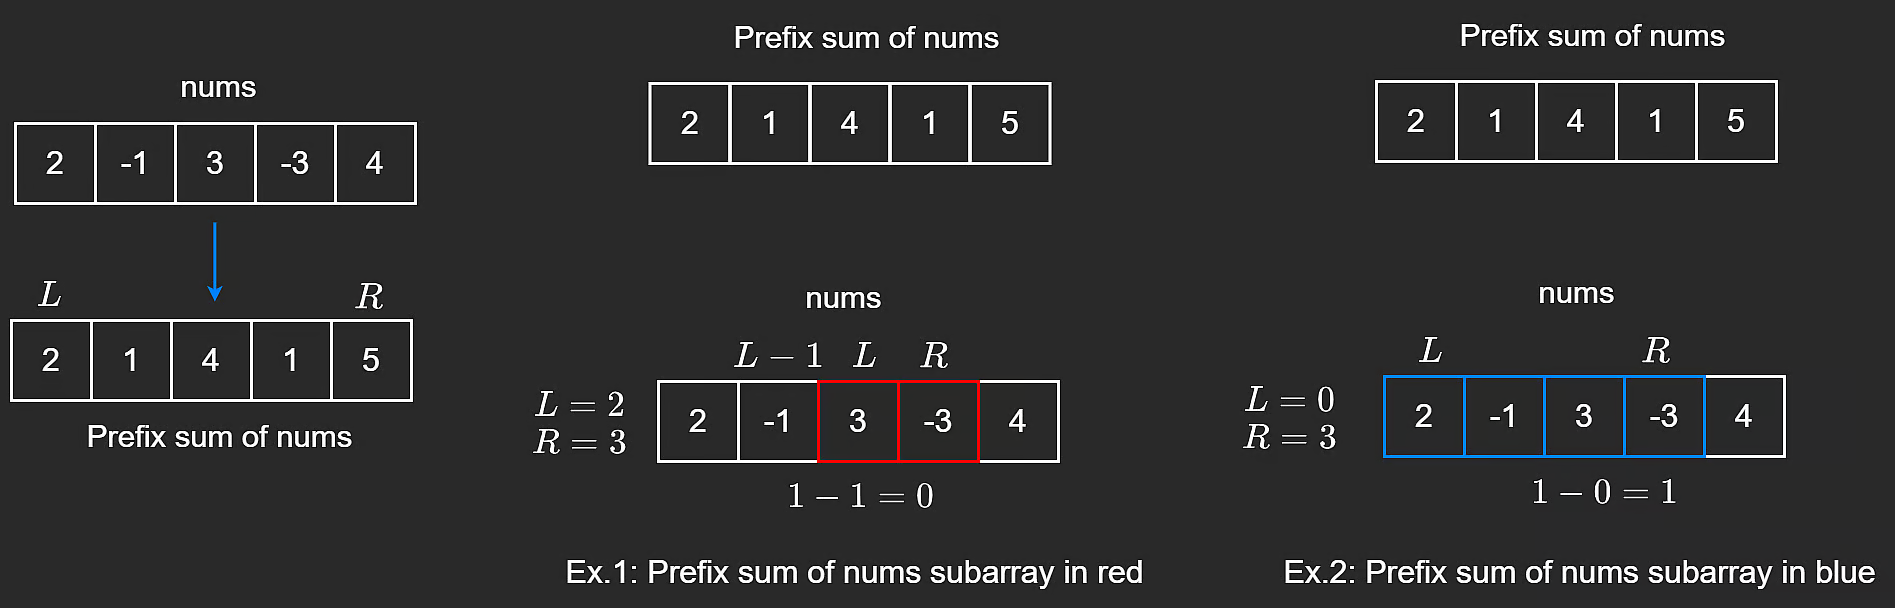

In [ ]:
class PrefixSum:

    def __init__(self, nums):
        self.prefix = []
        total = 0
        for n in nums:
            total += n
            self.prefix.append(total)

    def rangeSum(self, left, right):
        #preRight is the sum of the subarray from 0 to right (inclusive)
        preRight = self.prefix[right]
        #preLeft is the sum of subarray from 0 to left (inclusive)
        #we do a zero in case left is index zero here
        preLeft = self.prefix[left - 1] if left > 0 else 0
        #this contains sum of elems from index `left+1` to `right`
        return (preRight - preLeft)


## Time Complexity

Building the initial prefix sum is $O(n)$, as we iterate through every elem. Calculating the rangesum is $O(1)$ no matter how large the array is!

## Notes

- Sum is not the only operation we do using this technique! We can also do prefix product/other operations
- You can also do the **postfix sum**, which is a running sum of all elems from the *end* of array and going backwards
---

## Problem: Range Sum Query 2D

Given a 2D matrix matrix, handle multiple queries of the following type:

Calculate the sum of the elements of matrix inside the rectangle defined by its *upper left corner* `(row1, col1)` and *lower right corner* `(row2, col2)` inclusive

You must design an algorithm where sumRegion works on O(1) time complexity.

- take note of how they do the padding, gets rid of edge cases where you have to write `if` statements!

In [ ]:
#my sol where sumregion removes padding
class NumMatrix:

    def __init__(self, matrix: List[List[int]]):
        n,m=len(matrix),len(matrix[0])
        #create 2D prefix sum
        #padding
        self.pre=[[0]*(m+1) for _ in range(n+1)]

        for r in range(1,n):
            for c in range(1,m):
                self.pre[r][c]=self.pre[r][c-1]+self.pre[r-1][c]
        
        for i in range(1, n + 1):
            for j in range(1, m + 1):
                self.pre[i][j] = (
                    #add above
                    self.pre[i-1][j] +
                    #add left
                    self.pre[i][j-1] -
                    #add diagonal
                    self.pre[i-1][j-1] +
                    #add this elem
                    matrix[i-1][j-1]
                )

        
        #remove padding
        self.pre=self.pre[1:]
        self.pre=[row[1:] for row in self.pre]

    def sumRegion(self, row1: int, col1: int, row2: int, col2: int) -> int:
        #subtract top rectangle
        top=self.pre[row1-1][col2] if row1>0 else 0
        #subtract left rectangle
        left=self.pre[row2][col1-1] if col1>0 else 0
        #add diagonal rectangle
        dia=self.pre[row1-1][col1-1] if row1>0 and col1>0 else 0

        return self.pre[row2][col2]-top-left+dia

In [ ]:
#sumregion has padding which makes it more efficient
class NumMatrix:
    def __init__(self, matrix):
        #this is the prefix sum
        self.sum_ = [[0] * (len(matrix[0]) + 1) for _ in range(len(matrix) + 1)]
        # a line is a row

        #padding on top and left is done here!
        for i, line in enumerate(matrix):
            previous = 0
            for j, num in enumerate(line):
                previous += num
                #the first above will be all zeros
                above = self.sum_[i][j + 1]
                #the 'real' index in the prefix sum is (i+1,j+1)
                self.sum_[i + 1][j + 1] = previous + above

    def sumRegion(self, row1, col1, row2, col2):
        '''beware of the padding in self.sum_
        this padding is important as without it, you need to write a bunch of for/if loops to check for first elem and 0 etc'''
    
        #subtract top rectangle
        top=self.sum_[row1][col2+1]
        #subtract left rectangle
        left=self.sum_[row2+1][col1]
        #add diagonal rectangle
        dia=self.sum_[row1][col1]

        #collapse all this into one to avoid assigning so many extra variables
        return self.sum_[row2+1][col2+1]-top-left+dia


---

## Problem: Product of Array discluding self

Given an integer array `nums`, return an array `output` where `output[i]` is the product of all the elements of `nums` except `nums[i]`.

Each product is guaranteed to fit in a 32-bit integer.

> solve this in $O(n)$ time without using the division operation

In [ ]:
#mysol
class Solution:
    def productExceptSelf(self, nums: List[int]) -> List[int]:
        #left product
        left=1
        ls=[]
        for n in nums:
            left=left*n
            ls.append(left)

        #right product
        right=1
        rs=[]
        for n in nums[::-1]:
            right=right*n
            rs=[right]+rs

        #padding
        ls=[1]+ls+[1]
        rs=[1]+rs+[1]

        #build the thing
        res=[]
        for i in range(1,len(nums)+1):
            res.append(ls[i-1]*rs[i+1])
        
        return res

In [ ]:
#theirsol does it in one loop instead. it is also O(n) memory which is very impressive, only uses one array of len(nums)!

class Solution:
    def productExceptSelf(self, nums: List[int]) -> List[int]:
        res = [1] * (len(nums))
        #prefix sum
        for i in range(1, len(nums)):
            res[i] = res[i-1] * nums[i-1]
        #at this point, res is doesnt multiply last elem
        postfix = 1
        #from last elem till first elem
        for i in range(len(nums) - 1, -1, -1):
            #multiplu everyth except last elem
            res[i] *= postfix
            postfix *= nums[i]
        return res
